## Project Overview

Global warming, Climate change, and Human health are getting impacted due to excessive agri-food emissions. Hence, the predictive analysis of average temperature increase that is caused by the CO2 emissions from agri-food activities is important for policymakers and researchers to develop strategies for sustainable agricultural practices. This project explores historical data on agri-food CO2 emissions and it's impact on the increase of temperature in various countries around the world for a time span of 30 years (1990–2020). Since there is a need for predicting emission from the agri-food sector and corresponding temperature increase, this project explores this area by implementing the three predictive models Linear Regression, Decision Trees, Random Forests. Exploratory data analysis (EDA) helps to understand the descriptive statistics, and data visualizations on agri-food activities, emissions, temperature rise, and their relationships. The three predictive models are trained and measured with metrics like MSE, RMSE, MAE, and R-squared. The Linear Regression model emerged as the best model with the highest predictive accuracy, with the lowest RMSE, MAE and highest R2-score for CO2 emissions. The project concludes that Linear Regression can serve as a robust tool in predicting tempereture increase from CO2 emissions from agri-food activities and helps the policymakers, government bodies, and sustainable environment by providing useful insights and strategies to reduce the environmental impact of agriculture.

**This Project aims to:**
Understand the relationship between Temperature rise and CO2 emission derriving from the agri-food sector activities.
Extensively investigate the relationship amongst an extensive list of agri-food processes CO2 mmisions and average temperature rise.
Identify any potential correlations between the agri-food sector mmissions and average temperature increase.

**Import Packages**

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer # We need .experimental, .impute, .linear_model for data imputation using the MICE framework. 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler 



## Load Data

In [2]:
# Load the data. 
df = pd.read_csv("co2_emissions_from_agri.csv")

**Data dictionary**




## Cleaning Data

In [3]:
# Check the first few rows of the dataset
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [5]:
# Count missing values in each column
df.isnull().sum()  

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [7]:
#Check how many rows and how many columns
df.shape

(6965, 31)

In [8]:
# Standardize column names
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")

In [9]:
# Check the first few rows of the dataset
df.head()

,AREA,YEAR,SAVANNA_FIRES,FOREST_FIRES,CROP_RESIDUES,RICE_CULTIVATION,DRAINED_ORGANIC_SOILS_(CO2),PESTICIDES_MANUFACTURING,FOOD_TRANSPORT,FORESTLAND,...,MANURE_MANAGEMENT,FIRES_IN_ORGANIC_SOILS,FIRES_IN_HUMID_TROPICAL_FORESTS,ON-FARM_ENERGY_USE,RURAL_POPULATION,URBAN_POPULATION,TOTAL_POPULATION_-_MALE,TOTAL_POPULATION_-_FEMALE,TOTAL_EMISSION,AVERAGE_TEMPERATURE_°C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AREA                             6965 non-null   object 
 1   YEAR                             6965 non-null   int64  
 2   SAVANNA_FIRES                    6934 non-null   float64
 3   FOREST_FIRES                     6872 non-null   float64
 4   CROP_RESIDUES                    5576 non-null   float64
 5   RICE_CULTIVATION                 6965 non-null   float64
 6   DRAINED_ORGANIC_SOILS_(CO2)      6965 non-null   float64
 7   PESTICIDES_MANUFACTURING         6965 non-null   float64
 8   FOOD_TRANSPORT                   6965 non-null   float64
 9   FORESTLAND                       6472 non-null   float64
 10  NET_FOREST_CONVERSION            6472 non-null   float64
 11  FOOD_HOUSEHOLD_CONSUMPTION       6492 non-null   float64
 12  FOOD_RETAIL         

## Exploratory Data Analysis (EDA)

In [11]:
# Checking for outliers (basic statistics)
df.describe()

,YEAR,SAVANNA_FIRES,FOREST_FIRES,CROP_RESIDUES,RICE_CULTIVATION,DRAINED_ORGANIC_SOILS_(CO2),PESTICIDES_MANUFACTURING,FOOD_TRANSPORT,FORESTLAND,NET_FOREST_CONVERSION,...,MANURE_MANAGEMENT,FIRES_IN_ORGANIC_SOILS,FIRES_IN_HUMID_TROPICAL_FORESTS,ON-FARM_ENERGY_USE,RURAL_POPULATION,URBAN_POPULATION,TOTAL_POPULATION_-_MALE,TOTAL_POPULATION_-_FEMALE,TOTAL_EMISSION,AVERAGE_TEMPERATURE_°C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


Text(0.5, 0.98, 'Average Temperature time series')

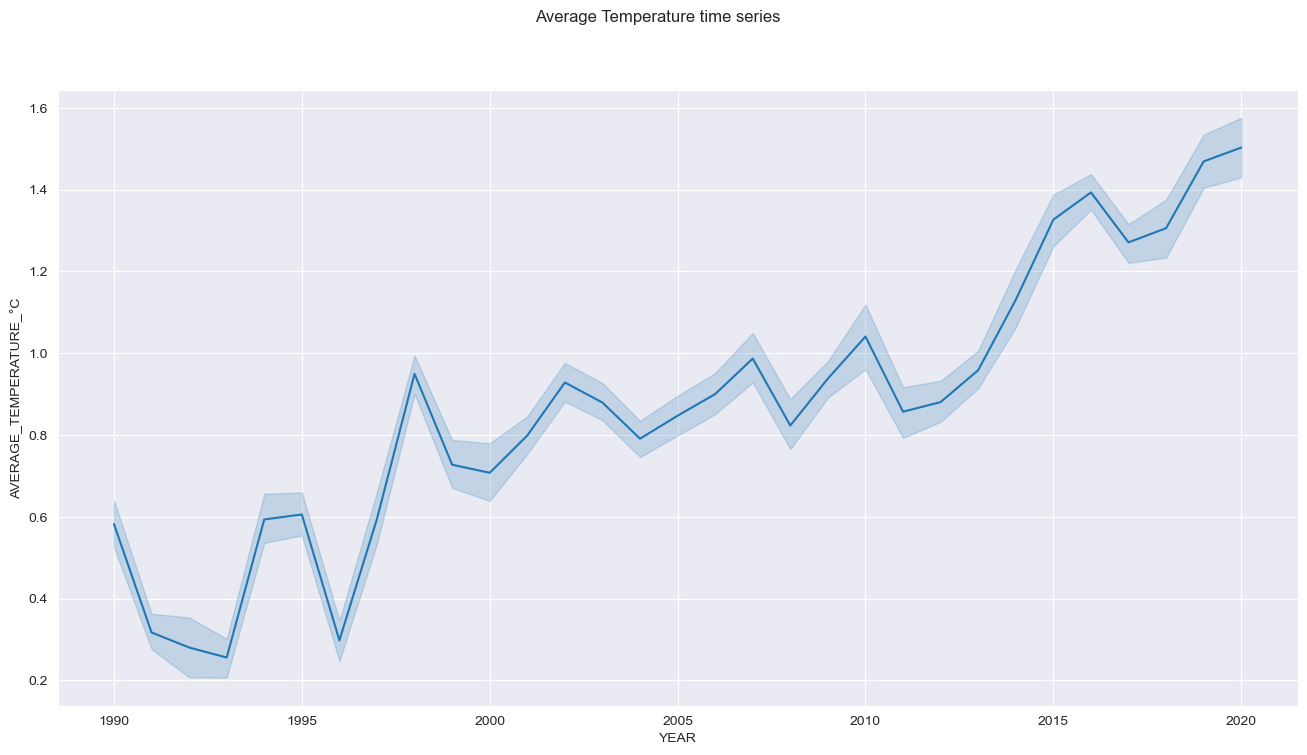

In [12]:
sns.set_style("darkgrid") #set the style of your preference
fig, ax =plt.subplots(figsize = (16,8)) #set figure and axes
sns.lineplot(data = df, x = 'YEAR', y = 'AVERAGE_TEMPERATURE_°C', ax = ax) #plot a lineplot with Year in the x-axis and the average temperature in the y-axis
fig.suptitle('Average Temperature time series') #choose a title

Since 1990, the average land temperature line, compared to pre-industrial times, showcases an upward trend, hitting an all time high of approximately 1.5°C in 2020. 

In [13]:
#If the values are not standardized, we won't be able to plot the lines in the same graph, as the scales will be totally different. 
from sklearn.preprocessing import MinMaxScaler # Import min-max scaler. This will transform all the variable to take values between 0 and 1.

scaler = MinMaxScaler() #let's instantiate it.

temp_emission = df.groupby("YEAR").agg({"AVERAGE_TEMPERATURE_°C": "mean", "TOTAL_EMISSION": "mean", 'URBAN_POPULATION': 'mean'}) # let's calculate 
                                                                                                                                #the mean emission, 
                                                                                                                                #population and temperature per year
norm_emission= scaler.fit_transform(temp_emission) #Here we transform the mean values using the scaler.

temp_df = pd.DataFrame(norm_emission, columns = ['Standardized Avg Temperature','Standardized Mean CO2 emission', 'Standardized Mean Urban Population']) #because the scaler outputs 
                                                                                                                                                    ##Nparrays, let's create a df.
temp_df.index = [i for i in range(1990, 2021)] # the data were grouped by year and hence, we can use the year as index. The starting year is 1990 and the end year 2020

[]

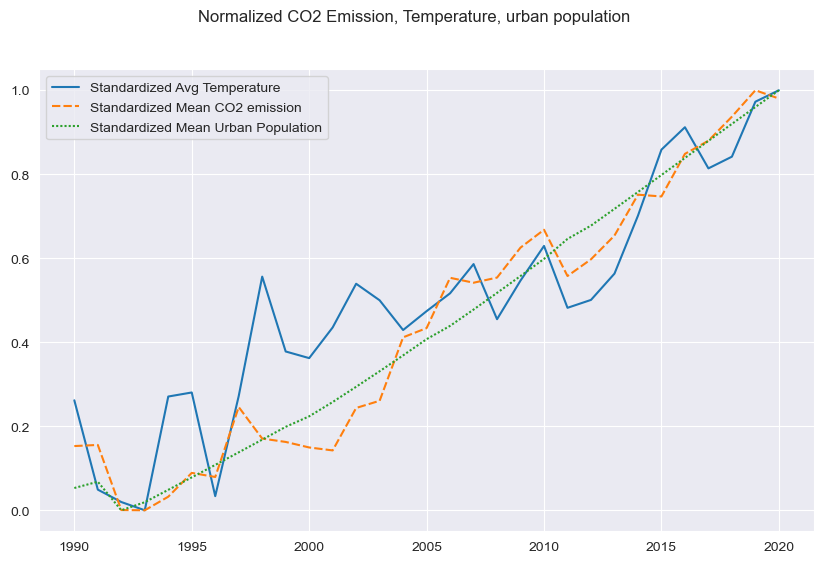

In [14]:
fig, ax = plt.subplots(figsize = (10,6)) # Let's set our figure and axes

g = sns.lineplot(temp_df, ax = ax) #Use seaborn because its looking cool
fig.suptitle('Normalized CO2 Emission, Temperature, urban population')
plt.plot() # and plot

The graph above shows that CO2 emission, mean urban population and average temperature go hand in hand. All three lines show a strong upward trend.

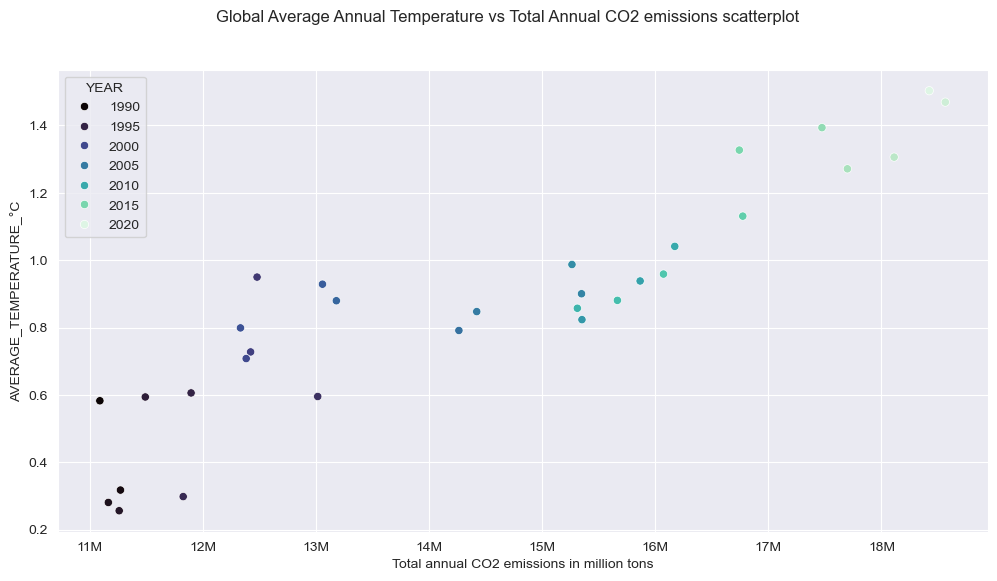

In [15]:
from matplotlib.ticker import FuncFormatter # We gonna use this to convert a big number to millions

temp = df.iloc[:,  1:].groupby('YEAR').agg({'AVERAGE_TEMPERATURE_°C':'mean', 'TOTAL_EMISSION':'sum'} ) #Let's group by year and calculate mean annual temperature 
                                                                                                       ## and total annual emissions for all countries cummulatively.
fig, ax = plt.subplots(figsize = (12, 6))
g = sns.scatterplot(data = temp, x = 'TOTAL_EMISSION', y = 'AVERAGE_TEMPERATURE_°C', ax = ax, hue ='YEAR', palette = "mako") 

def millions_formatter(x, pos):  # Let's define a function that takes a number divides it by 1000000 and returns it in millions.
    return '{:,.0f}M'.format(x / 1000000) 

# Apply the formatter to the x-axis ticks
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

fig.suptitle('Global Average Annual Temperature vs Total Annual CO2 emissions scatterplot')
ax.set_xlabel('Total annual CO2 emissions in million tons')
plt.show()

Total emissions and temperature are gradually increasing over time which indicates a potential 
correlation between them. Both CO2 emissions and temperature continue to rise sharply i 
recent years, indicating ongoing environmental challenges with respect to global warming a d
greenhouse gas emissions.

In [16]:
temp = df.iloc[:, 2: -7].copy() # Do not include the first and second column as it is area and year
delete_list = ['FORESTLAND', 'NET_FOREST_CONVERSION', 'ON-FARM_ELECTRICITY_USE'] #rule out all non-relevant features
temp = temp.drop(delete_list, axis = 1)
means = temp.mean()#calculate the mean anual values for each feature
means.sort_values(ascending = False, inplace = True) #sort them in descending order
cols = means.index #the column names are the indices

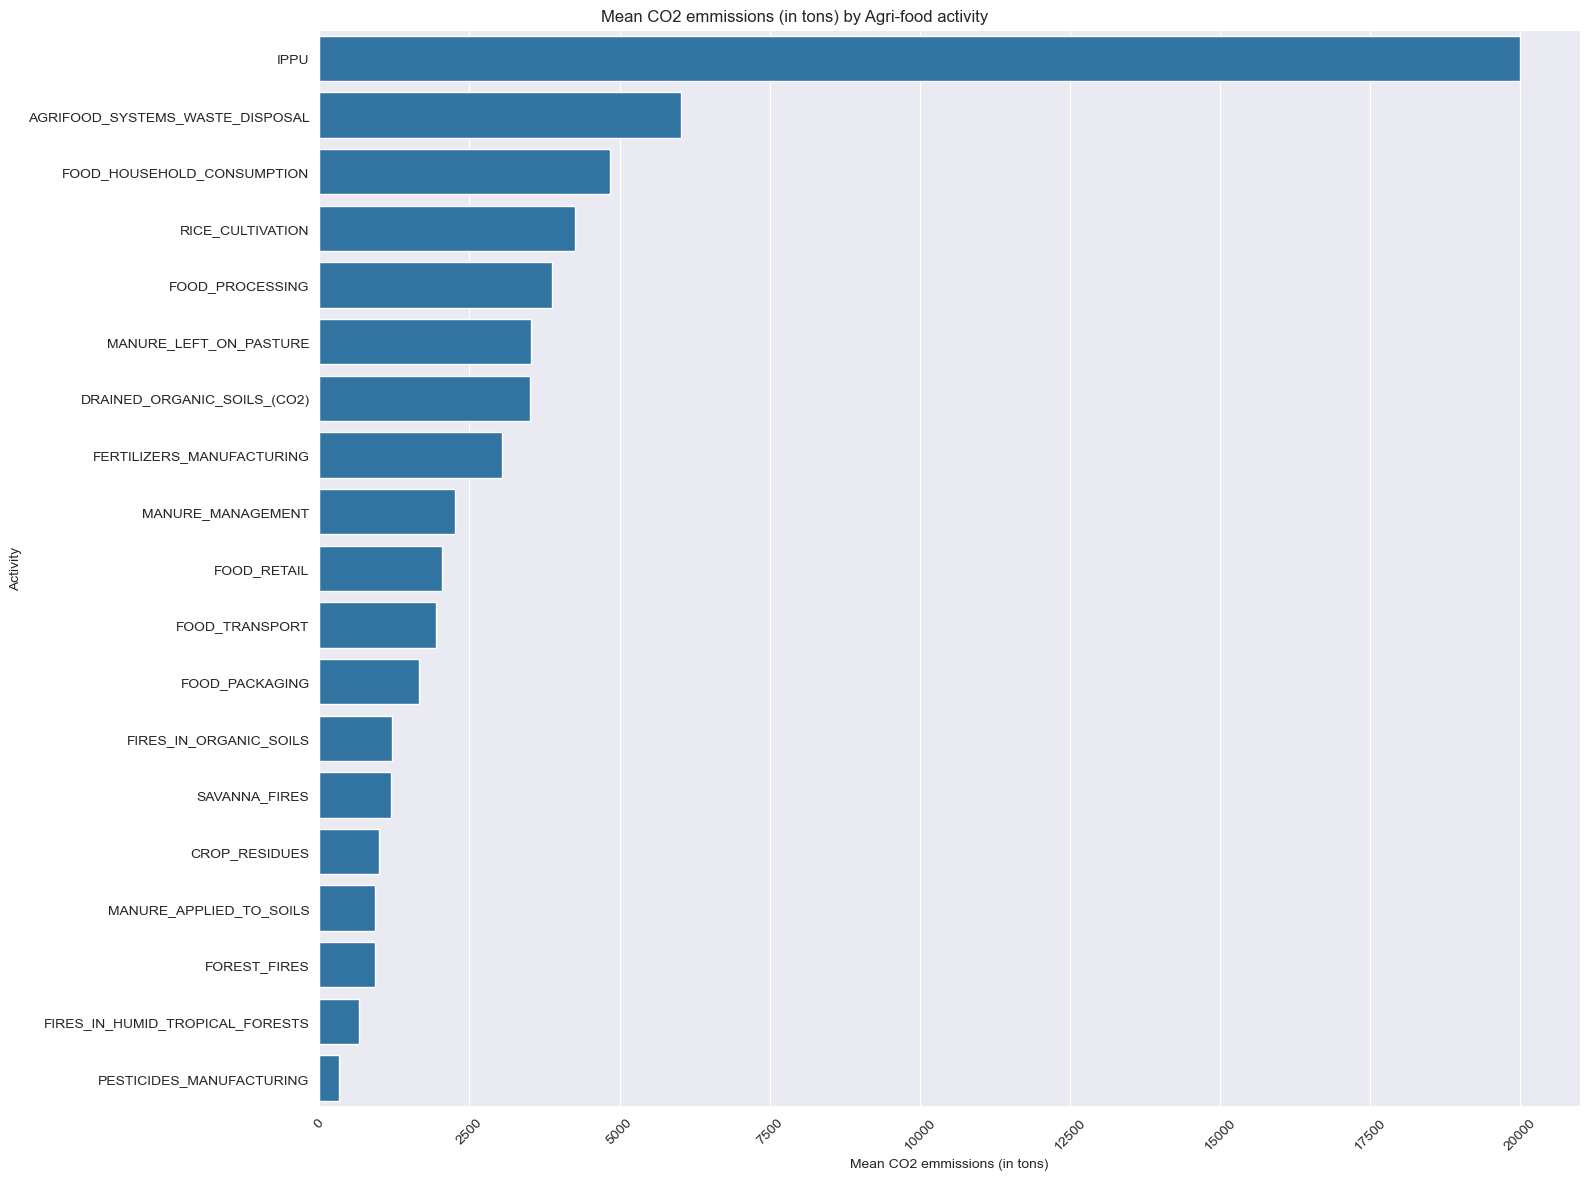

In [17]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.barplot(x=means, y=cols, ax=ax) #wrap x and y parameters

ax.set_ylabel("Activity")  # Set the y-axis label
ax.set_xlabel("Mean CO2 emmissions (in tons)")     # Set the x-axis label
fig.suptitle('Mean CO2 emmissions (in tons) by Agri-food activity')

plt.xticks(rotation=45)      # Rotate x-axis labels for better visibility
plt.tight_layout()           # Adjust layout to prevent labels from getting cut off
plt.show()

The above graph shows that IPPU is by far the acctivity with the most CO2 emissions, followed by emissions coming from waste disposal and agrifood products consumption. Thereafter, other industrial and cultivation activities follow, with fire emissions coming towards the end

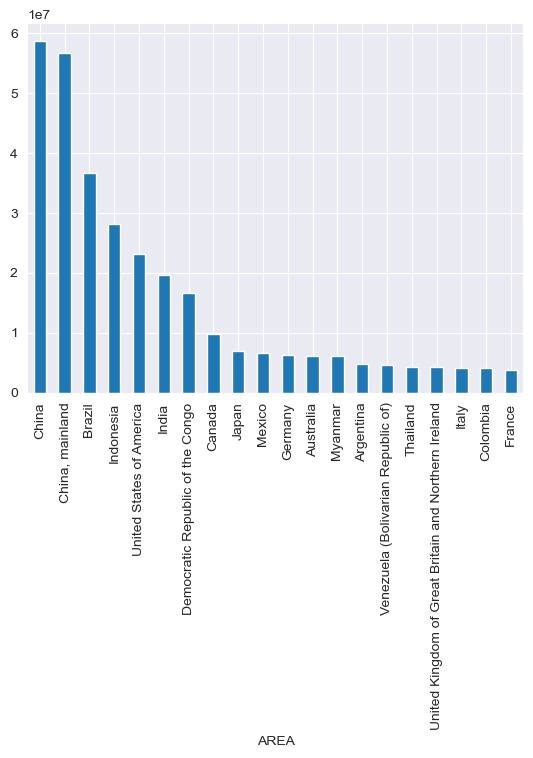

In [18]:
df.groupby('AREA')['TOTAL_EMISSION'].sum().sort_values(ascending=False).head(20).plot.bar();

The graph above shows that China has the highest CO2 emission, followed by Brazil,Indonesia and USA.

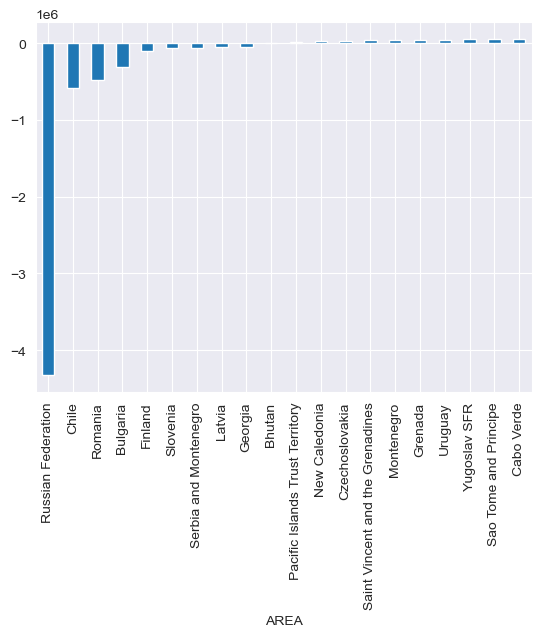

In [19]:
df.groupby('AREA')['TOTAL_EMISSION'].sum().sort_values(ascending=True).head(20).plot.bar();

This graph shows that Russia has the lowest CO2 emission.

In [20]:
# Select relevant columns
selected_columns = ['AREA', 'TOTAL_EMISSION', 'AGRIFOOD_SYSTEMS_WASTE_DISPOSAL', 'FOOD_HOUSEHOLD_CONSUMPTION',
                    'FOREST_FIRES', 'FIRES_IN_HUMID_TROPICAL_FORESTS', 'SAVANNA_FIRES',
                    'IPPU', 'FOOD_PROCESSING', 'FOOD_TRANSPORT', 'FOOD_PACKAGING', 'PESTICIDES_MANUFACTURING',
                    'FERTILIZERS_MANUFACTURING', 'FOOD_RETAIL',
                    'RICE_CULTIVATION', 'MANURE_LEFT_ON_PASTURE', 'DRAINED_ORGANIC_SOILS_(CO2)',
                    'CROP_RESIDUES', 'MANURE_MANAGEMENT', 'MANURE_APPLIED_TO_SOILS', 'AVERAGE_TEMPERATURE_°C', 'YEAR']

# Create a simplified DataFrame with selected columns
temp2 = df[selected_columns].copy()

# Calculate the categories total values
emission_sources = ['FOREST_FIRES', 'FIRES_IN_HUMID_TROPICAL_FORESTS', 'SAVANNA_FIRES',
                    'IPPU', 'FOOD_PROCESSING', 'FOOD_TRANSPORT', 'FOOD_PACKAGING', 'PESTICIDES_MANUFACTURING',
                    'FERTILIZERS_MANUFACTURING', 'FOOD_RETAIL',
                    'RICE_CULTIVATION', 'MANURE_LEFT_ON_PASTURE', 'DRAINED_ORGANIC_SOILS_(CO2)',
                    'CROP_RESIDUES', 'MANURE_MANAGEMENT', 'MANURE_APPLIED_TO_SOILS']

temp2['TOTAL_FIRE_EMISSIONS'] = temp2[emission_sources[:3]].sum(axis=1)
temp2['TOTAL_INDUSTRIAL_EMISSIONS'] = temp2[emission_sources[3:12]].sum(axis=1)
temp2['TOTAL_CULTIVATION_EMISSIONS'] = temp2[emission_sources[12:]].sum(axis=1)


# Calculate mean values for all emission sources
means = temp2[['TOTAL_FIRE_EMISSIONS', 'TOTAL_INDUSTRIAL_EMISSIONS', 'TOTAL_CULTIVATION_EMISSIONS',
               'AGRIFOOD_SYSTEMS_WASTE_DISPOSAL', 'FOOD_HOUSEHOLD_CONSUMPTION']].mean()

means.rename({'TOTAL_FIRE_EMISSIONS' : 'mean_fire_emissions', 'TOTAL_INDUSTRIAL_EMISSIONS' : 'mean_industrial_emissions', 
                       'TOTAL_CULTIVATION_EMISSIONS' : 'mean_cultivation_emissions', 
                       'AGRIFOOD_SYSTEMS_WASTE_DISPOSAL' :  'mean Agrifood Systems Waste Disposal', 
                       'FOOD_HOUSEHOLD_CONSUMPTION' : 'mean Food Household Consumption'})


# Sort columns based on mean values in descending order
means.sort_values(ascending=False, inplace = True)

cols = means.index

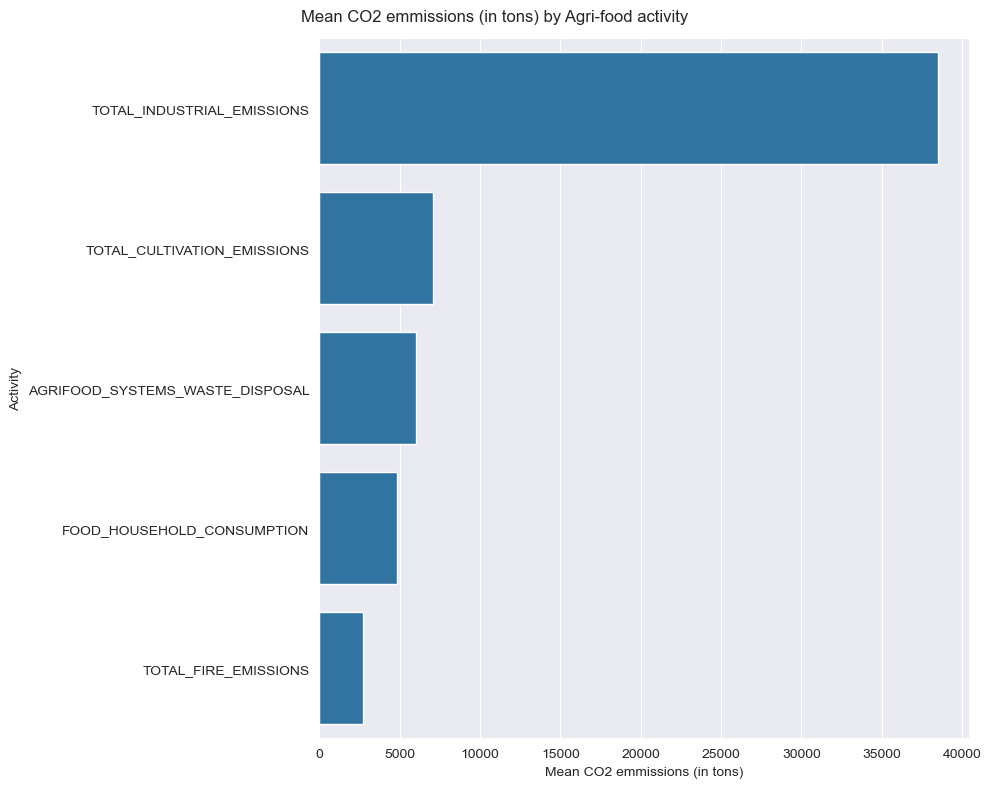

In [21]:
fig, ax = plt.subplots(figsize=(10, 8)) 
sns.barplot(x=means, y=cols, ax=ax) #wrap x and y parameters

ax.set_ylabel("Activity")  # Set the y-axis label
ax.set_xlabel("Mean CO2 emmissions (in tons)")     # Set the x-axis label
fig.suptitle('Mean CO2 emmissions (in tons) by Agri-food activity')
      
plt.tight_layout()           # Adjust layout to prevent labels from getting cut off
plt.show() #

The bar chart above shows that industrial activities emit the biggest proportion of CO2, followed by cultivation emissions (as opposed to waste disposal emissions), which in turn are followed by waste disposal emissions, consumption emissions, and fire emissions.

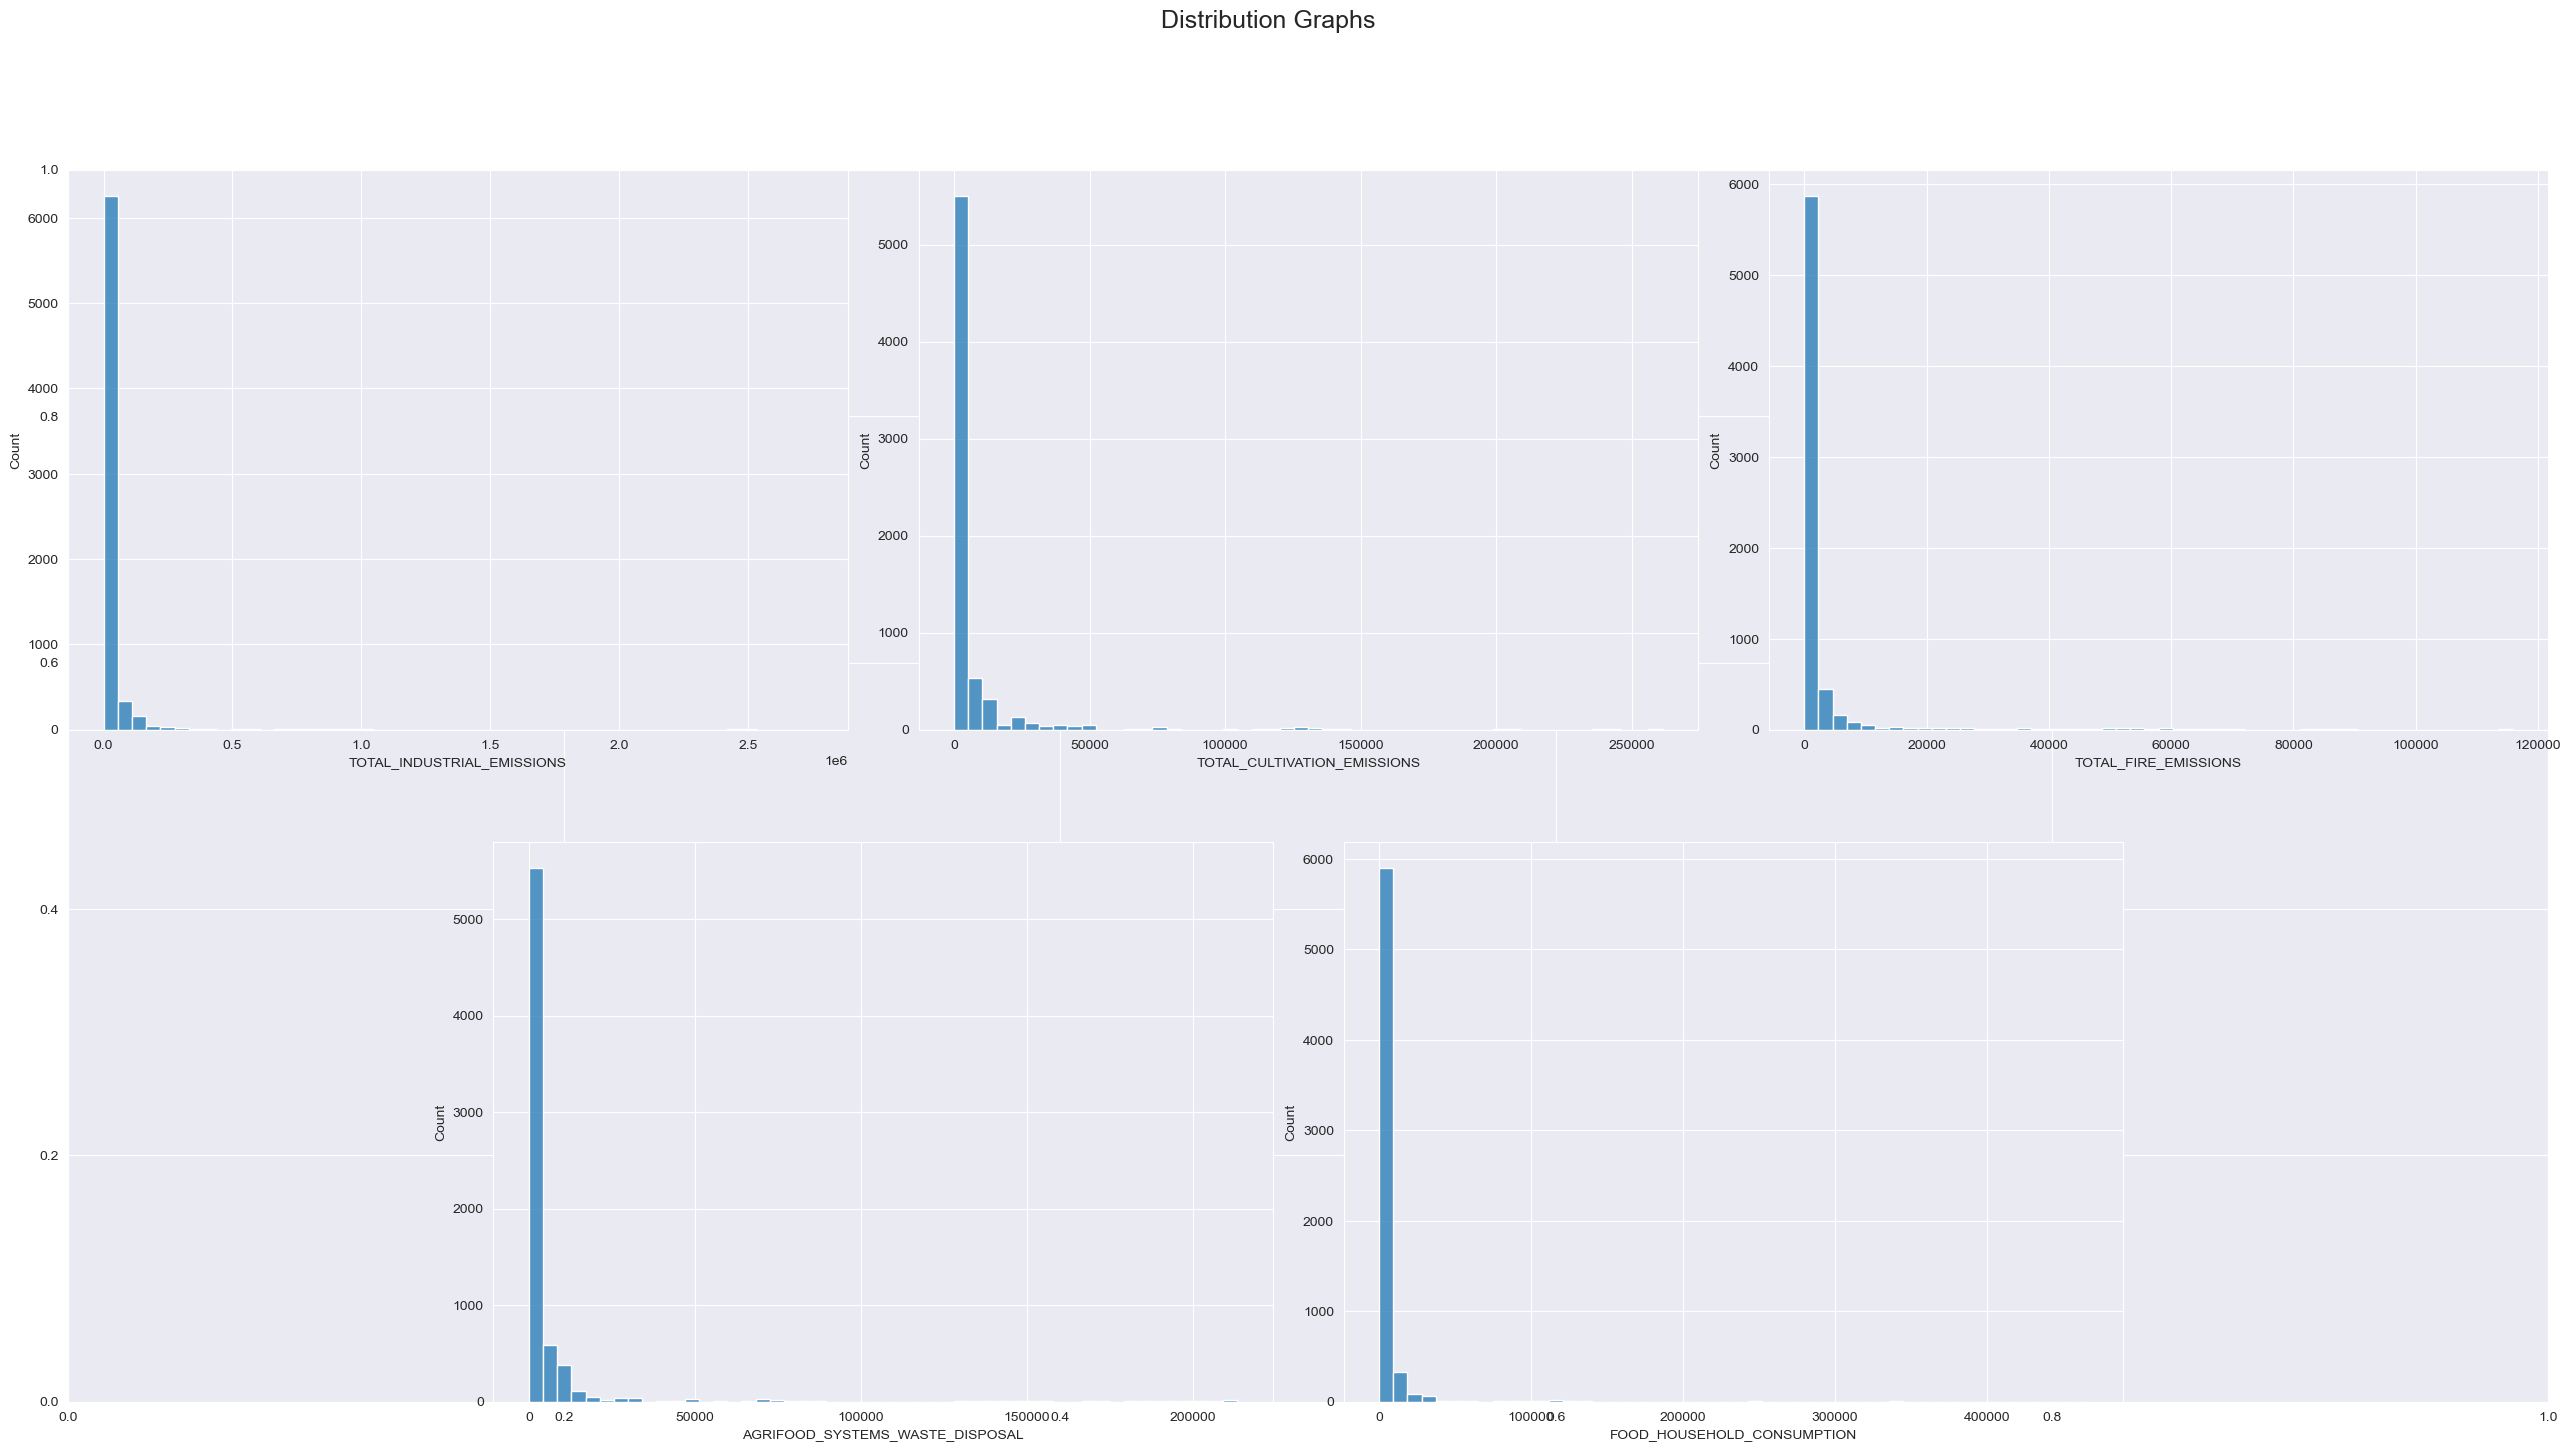

In [22]:
# Let's plot the distribution plots using subplot2grid to adjust the position and seaborn because its cool.

fig, ax = plt.subplots(figsize = (32, 16))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

sns.histplot(data = temp2, x='TOTAL_INDUSTRIAL_EMISSIONS', ax = ax1, bins = 50)
sns.histplot(data = temp2, x='TOTAL_CULTIVATION_EMISSIONS', ax = ax2, bins = 50)
sns.histplot(data = temp2, x='TOTAL_FIRE_EMISSIONS', ax = ax3, bins = 50)
sns.histplot(data = temp2, x='AGRIFOOD_SYSTEMS_WASTE_DISPOSAL', ax = ax4, bins = 50)
sns.histplot(data = temp2, x='FOOD_HOUSEHOLD_CONSUMPTION', ax = ax5, bins = 50)

fig.suptitle('Distribution Graphs', fontsize = 18)

plt.show()

The data are negatively skewed for all emission categories. This means that the histograms have a long right tail. The underlying reason for this behavior might be that the must majority of countries have a small or moderate agrifood sector and hence the emissions are much lower in comparison to agrifood and industrial giants such as China, the USA or Brazil.

<Axes: >

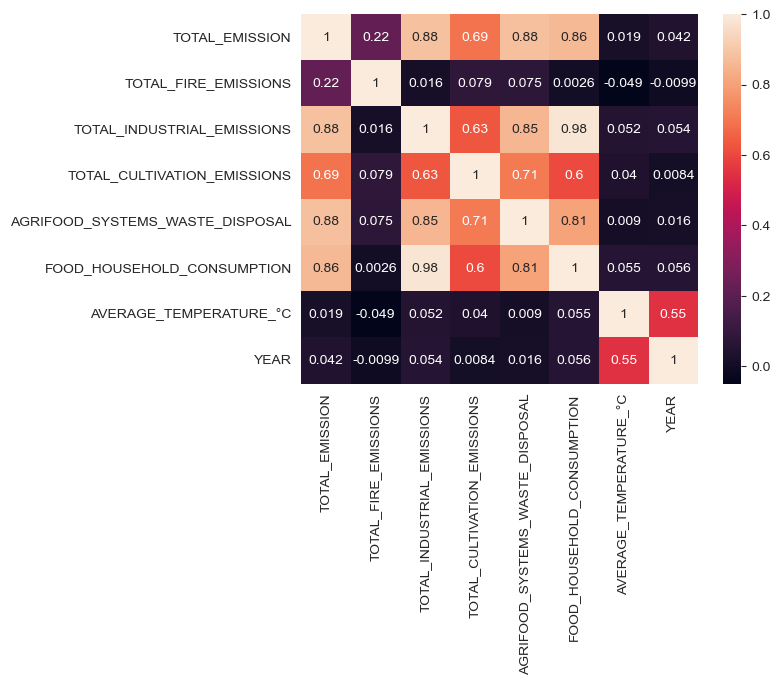

In [23]:
#choose the relevant variables
variables = ['TOTAL_EMISSION','TOTAL_FIRE_EMISSIONS',
       'TOTAL_INDUSTRIAL_EMISSIONS', 'TOTAL_CULTIVATION_EMISSIONS',
       'AGRIFOOD_SYSTEMS_WASTE_DISPOSAL',
       'FOOD_HOUSEHOLD_CONSUMPTION', 'AVERAGE_TEMPERATURE_°C', 'YEAR' ]

#add them to temp3
temp3 = temp2[variables].copy()

sns.heatmap(data = temp3.corr(), annot = True)

In [24]:
# Calculate and add Global Temperature mean per year to temp4
temp4 = temp3.copy()
temp4 = temp4.groupby('YEAR').transform('mean')

Text(0.5, 0.98, 'Critical variables aggregated by year scatterplot')

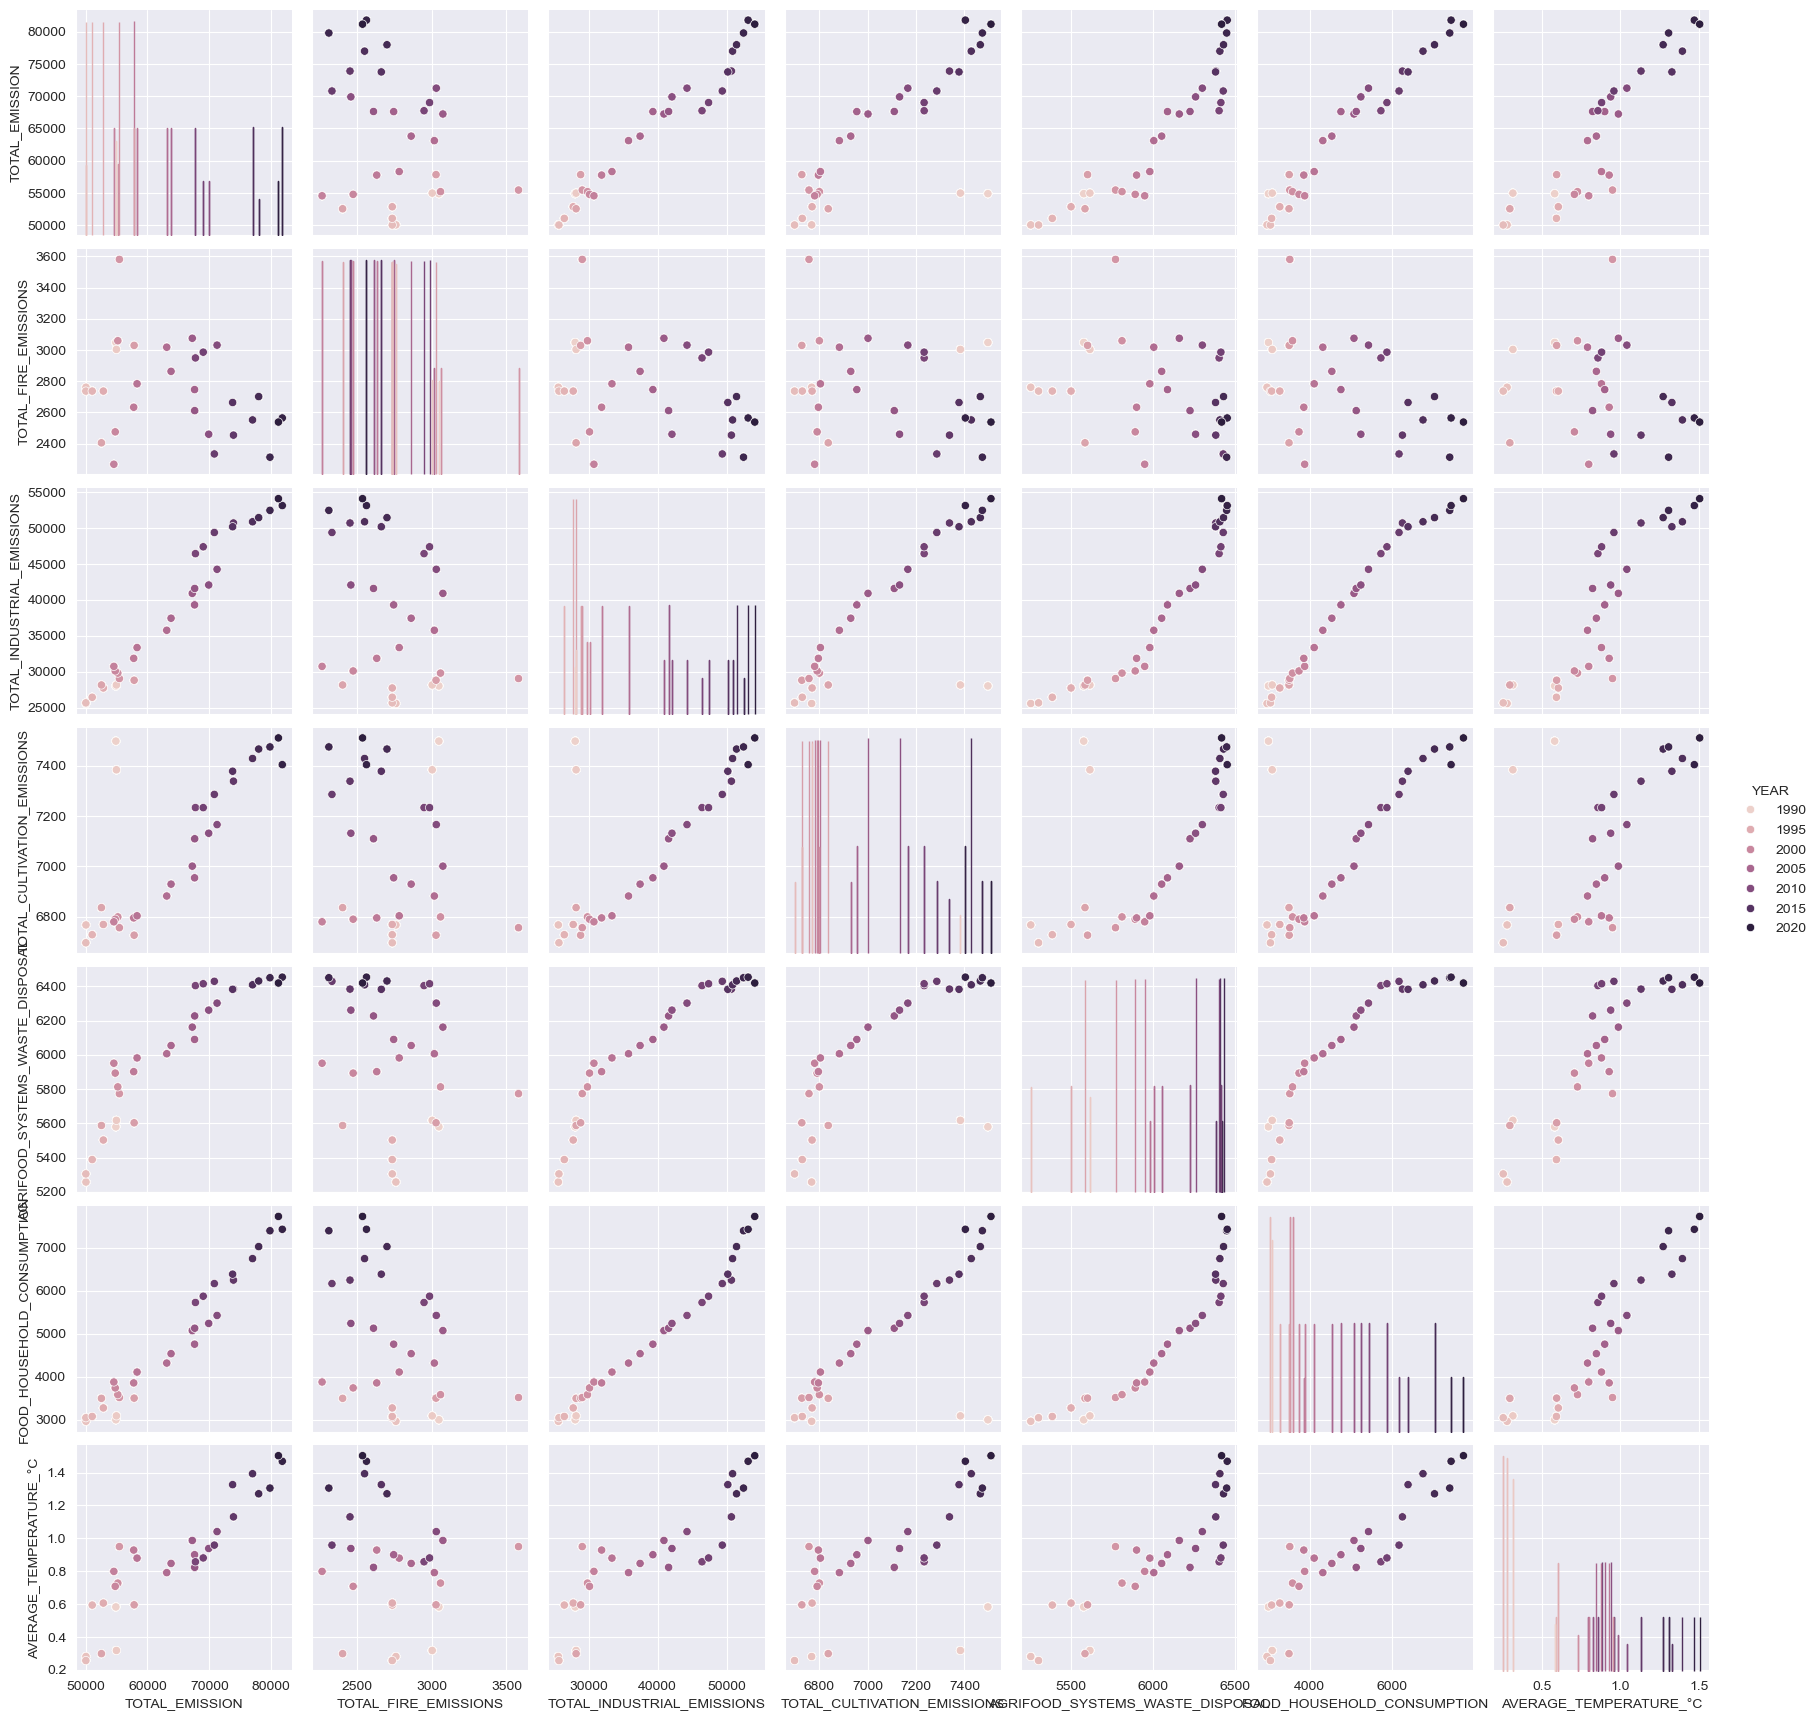

In [25]:
temp4['YEAR'] = temp3['YEAR']
sns.pairplot(data = temp4, hue = 'YEAR')
fig.suptitle('Critical variables aggregated by year scatterplot', fontsize = 18)

<Axes: >

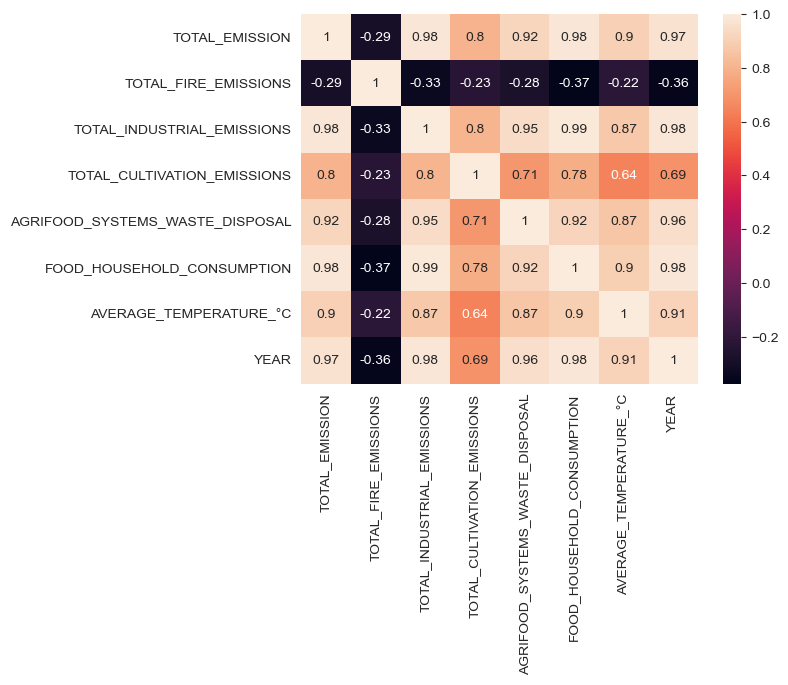

In [26]:
sns.heatmap(data = temp4.corr(), annot = True)

The positive relationship amongst most predictor and Global Temperature is demonstrated in the heatmap above.

The average temperature increase, along with urban population and total emissions showcase an upward trend.
Industrial processes emit the most CO2 in the agri-food sector, while fire emissions the least.
China, India, Brazil and the USA emit the most CO2 from the agri-food sector.
Temperature rise seems to be strongly related to Year and Area.
Fire emissions do not seem to be related to temperature rise.
All agri-food sector processes emissions seem to be strongly, positively related to the increase in the average global temperature.

**Model Evaluation Metrics**

Model evaluation metrics such as MSE, RMSE, MAE, and R2 are used in this project to measure the performance of predictive models. These metrics show how well a model predicts average temperature rise which assists in selection of the most accurate and reliable model.

**Handling Missing Values**

Before we can run the models we need to deal with the null values present in our dataset.There are quite a few null values that we need to deal with. It is important to understand whether the null values are null because data was not collected or because there is some meaning into it. We will need to check each variable seperately in order to make sense. Let's have a look at the area,maybe it will give us some insight.

In [27]:
#Let's start with Savanna fires. 
##I will make a new df series  'bool_series', that holds the boolean values of whether the Savanna fires column contains null values.
df['bool_series'] = pd.isnull(df["SAVANNA_FIRES"])

In [28]:
# now using 'bool_series', I will check which areas have null values in the column 'Savanna fires'.
df.loc[df['bool_series'], 'AREA'].unique()

array(['Holy See'], dtype=object)

The data shows that Holy See is the only area that has no records of Savanna values. This makes sence since it is not possible that such fire events occur in the city of Vatican. We will also need to check what other null values this Area has. It is a special case of an area since many features such as Forest fires, Savanna fires, manure, and tropical forest fires or farms do not exist.

In [29]:
# Let's see
null = df[df['AREA'] == 'Holy See'].isnull()

In [30]:
null.sum()

AREA                                0
YEAR                                0
SAVANNA_FIRES                      31
FOREST_FIRES                       31
CROP_RESIDUES                      31
RICE_CULTIVATION                    0
DRAINED_ORGANIC_SOILS_(CO2)         0
PESTICIDES_MANUFACTURING            0
FOOD_TRANSPORT                      0
FORESTLAND                          0
NET_FOREST_CONVERSION               0
FOOD_HOUSEHOLD_CONSUMPTION          0
FOOD_RETAIL                         0
ON-FARM_ELECTRICITY_USE             0
FOOD_PACKAGING                      0
AGRIFOOD_SYSTEMS_WASTE_DISPOSAL     0
FOOD_PROCESSING                     0
FERTILIZERS_MANUFACTURING           0
IPPU                                0
MANURE_APPLIED_TO_SOILS            31
MANURE_LEFT_ON_PASTURE              0
MANURE_MANAGEMENT                  31
FIRES_IN_ORGANIC_SOILS              0
FIRES_IN_HUMID_TROPICAL_FORESTS    31
ON-FARM_ENERGY_USE                 31
RURAL_POPULATION                    0
URBAN_POPULA

The data shows that those features contain null values because in reality they are non existent in the Holy see therefore we will fill all the null values with 0.

In [31]:
df.loc[df['AREA'] == 'Holy See'] = df[df['AREA'] == 'Holy See'].fillna(0)

In [32]:
#Done.
df.loc[df['AREA'] == 'Holy See']

,AREA,YEAR,SAVANNA_FIRES,FOREST_FIRES,CROP_RESIDUES,RICE_CULTIVATION,DRAINED_ORGANIC_SOILS_(CO2),PESTICIDES_MANUFACTURING,FOOD_TRANSPORT,FORESTLAND,...,FIRES_IN_ORGANIC_SOILS,FIRES_IN_HUMID_TROPICAL_FORESTS,ON-FARM_ENERGY_USE,RURAL_POPULATION,URBAN_POPULATION,TOTAL_POPULATION_-_MALE,TOTAL_POPULATION_-_FEMALE,TOTAL_EMISSION,AVERAGE_TEMPERATURE_°C,bool_series
2835,Holy See,1990,0.0,0.0,0.0,9616.267306,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,768.0,340.0,370.0,18688.406793,0.905583,True
2836,Holy See,1991,0.0,0.0,0.0,9654.499823,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,774.0,330.0,360.0,18726.641610,-0.098083,True
2837,Holy See,1992,0.0,0.0,0.0,9616.267306,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,779.0,330.0,360.0,18684.924938,0.773167,True
2838,Holy See,1993,0.0,0.0,0.0,9616.267306,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,778.0,330.0,360.0,18684.874838,0.564417,True
2839,Holy See,1994,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,778.0,320.0,350.0,18717.728958,1.444500,True
2840,Holy See,1995,0.0,0.0,0.0,9687.355642,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,780.0,320.0,350.0,18755.973575,0.267167,True
2841,Holy See,1996,0.0,0.0,0.0,9687.355642,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,778.0,320.0,350.0,18755.981975,0.245167,True
2842,Holy See,1997,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,782.0,320.0,340.0,18717.754458,0.889583,True
2843,Holy See,1998,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,781.0,320.0,340.0,18717.784658,0.778250,True
2844,Holy See,1999,0.0,0.0,0.0,9649.123125,0.0,11.481085,26.262663,0.0,...,0.058149,0.0,0.0,0.0,781.0,310.0,340.0,18717.817658,0.926500,True


Let's have a look at Forest fires

In [33]:
df['bool_series'] = pd.isnull(df["FOREST_FIRES"])

In [34]:
df.loc[df['bool_series'], 'AREA'].unique()

array(['Monaco', 'San Marino'], dtype=object)

The data shows that Monaco and San Marino have null values for Forest fires. after investigating these areas we conclude that is reasonable that data has null values because there are no forest in those two areas.

In [35]:
#Here we locate the forest column of df only for the Areas of Monaco and San Marino and replace the null values with 0.
df.loc[(df['AREA'] == 'Monaco')|(df['AREA'] == 'San Marino'), ['FOREST_FIRES']] = df.loc[(df['AREA'] == 'Monaco') | (df['AREA']=='San Marino'), ['FOREST_FIRES']].fillna(0)

In [36]:
#Done
df.loc[(df['AREA'] == 'Monaco')|(df['AREA'] == 'San Marino')]

,AREA,YEAR,SAVANNA_FIRES,FOREST_FIRES,CROP_RESIDUES,RICE_CULTIVATION,DRAINED_ORGANIC_SOILS_(CO2),PESTICIDES_MANUFACTURING,FOOD_TRANSPORT,FORESTLAND,...,FIRES_IN_ORGANIC_SOILS,FIRES_IN_HUMID_TROPICAL_FORESTS,ON-FARM_ENERGY_USE,RURAL_POPULATION,URBAN_POPULATION,TOTAL_POPULATION_-_MALE,TOTAL_POPULATION_-_FEMALE,TOTAL_EMISSION,AVERAGE_TEMPERATURE_°C,bool_series
4117,Monaco,1990,0.0,0.0,NaN,8976.562525,0.0,11.481085,0.0657,0.0,...,0.058149,NaN,NaN,0.0,29439.0,14435.0,15894.0,13617.314148,1.026750,True
4118,Monaco,1991,0.0,0.0,NaN,9014.795042,0.0,11.481085,0.0051,0.0,...,0.058149,NaN,NaN,0.0,29624.0,14577.0,15987.0,13204.334274,0.223833,True
4119,Monaco,1992,0.0,0.0,NaN,8976.562525,0.0,11.481085,0.0308,0.0,...,0.058149,NaN,NaN,0.0,29863.0,14722.0,16073.0,13618.319948,0.757167,True
4120,Monaco,1993,0.0,0.0,NaN,8976.562525,0.0,11.481085,0.0056,0.0,...,0.058149,NaN,NaN,0.0,30138.0,14864.0,16160.0,13619.547048,0.493333,True
4121,Monaco,1994,0.0,0.0,NaN,9009.418345,0.0,11.481085,0.0046,0.0,...,0.058149,NaN,NaN,0.0,30427.0,15002.0,16252.0,13651.372368,1.346000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,San Marino,2016,0.0,0.0,NaN,9009.418345,0.0,11.481085,0.9472,0.0,...,0.058149,NaN,NaN,1026.0,32177.0,16453.0,17381.0,13666.569235,1.684667,True
5506,San Marino,2017,0.0,0.0,NaN,9009.418345,0.0,11.481085,0.9791,0.0,...,0.058149,NaN,NaN,978.0,32422.0,16564.0,17492.0,13667.385535,1.665417,True
5507,San Marino,2018,0.0,0.0,NaN,9009.418345,0.0,11.481085,0.9884,0.0,...,0.058149,NaN,NaN,931.0,32626.0,16626.0,17530.0,13667.433635,2.006417,True
5508,San Marino,2019,0.0,0.0,NaN,9009.418345,0.0,11.481085,0.9953,0.0,...,0.058149,NaN,NaN,887.0,32796.0,16650.0,17527.0,13665.698735,1.968583,True


Let's check Fires in humid tropical forests.

In [37]:
df['bool_series'] = pd.isnull(df['FIRES_IN_HUMID_TROPICAL_FORESTS'])

In [38]:
df['bool_series'].sum()

124

In [39]:
df.loc[df['bool_series'], 'AREA'].unique()

array(['Channel Islands', 'Liechtenstein', 'Monaco', 'San Marino'],
      dtype=object)

Those 4 areas do not have humid tropical forest and hence the null values will be replaced to 0.

In [40]:
#Done.
df.loc[df['bool_series'], 'FIRES_IN_HUMID_TROPICAL_FORESTS'] = df.loc[df['bool_series'], 'FIRES_IN_HUMID_TROPICAL_FORESTS'].fillna(0)

We have identified all the missing values that can be filled reasonably(MNAR - Missing Data Not at Random) and have corrected them. The rest of the variables include many missing values, most probably because there are simply no such records present in the dataset at random (MAR - Missing Data at Random). We will use linear regression under the MICE (Multiple Imputation by Chained Equation) framework to fill the rest of the missing values.

In [41]:
#first we select all variables from df and write a list of the column names in the object num_features.
num_features = [col for col in df.columns]

In [42]:
#Area should be removed because in linear regression only continuous variables can be included.
num_features.remove('AREA')

In [44]:
#let's perform MICE. 
#call LinearRegression()
lr = LinearRegression()
#call the imputer and specify the estimator as lr, define the missing values as np.nan, and use a max_iteration stopping criterion.10 cycles should be enough.
##set random_state = 0 for reproducibility.also set the imputation_order as 'roman' which simply takes the variables from left to right. Verbose = 2, showing one line per cycle.
imp = IterativeImputer(estimator=lr,missing_values=np.nan,  max_iter=10, verbose=2, imputation_order='roman',random_state=0)
X=imp.fit_transform(df.iloc[:, 1:])

[IterativeImputer] Completing matrix with shape (6965, 31)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.37
[IterativeImputer] Change: 37363.538976281954, scaled tolerance: 902077.76 
[IterativeImputer] Early stopping criterion reached.


In [45]:
#Now let's create df2 which includes the imputed values
df2 = pd.DataFrame(X, columns = num_features)

In [46]:
#No null values included
df2.isnull().sum()

YEAR                               0
SAVANNA_FIRES                      0
FOREST_FIRES                       0
CROP_RESIDUES                      0
RICE_CULTIVATION                   0
DRAINED_ORGANIC_SOILS_(CO2)        0
PESTICIDES_MANUFACTURING           0
FOOD_TRANSPORT                     0
FORESTLAND                         0
NET_FOREST_CONVERSION              0
FOOD_HOUSEHOLD_CONSUMPTION         0
FOOD_RETAIL                        0
ON-FARM_ELECTRICITY_USE            0
FOOD_PACKAGING                     0
AGRIFOOD_SYSTEMS_WASTE_DISPOSAL    0
FOOD_PROCESSING                    0
FERTILIZERS_MANUFACTURING          0
IPPU                               0
MANURE_APPLIED_TO_SOILS            0
MANURE_LEFT_ON_PASTURE             0
MANURE_MANAGEMENT                  0
FIRES_IN_ORGANIC_SOILS             0
FIRES_IN_HUMID_TROPICAL_FORESTS    0
ON-FARM_ENERGY_USE                 0
RURAL_POPULATION                   0
URBAN_POPULATION                   0
TOTAL_POPULATION_-_MALE            0
T

In [47]:
X = df2.iloc[:,0:-1]
X

,YEAR,SAVANNA_FIRES,FOREST_FIRES,CROP_RESIDUES,RICE_CULTIVATION,DRAINED_ORGANIC_SOILS_(CO2),PESTICIDES_MANUFACTURING,FOOD_TRANSPORT,FORESTLAND,NET_FOREST_CONVERSION,...,MANURE_MANAGEMENT,FIRES_IN_ORGANIC_SOILS,FIRES_IN_HUMID_TROPICAL_FORESTS,ON-FARM_ENERGY_USE,RURAL_POPULATION,URBAN_POPULATION,TOTAL_POPULATION_-_MALE,TOTAL_POPULATION_-_FEMALE,TOTAL_EMISSION,AVERAGE_TEMPERATURE_°C
0,1990.0,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,...,319.1763,0.0,0.0,296.186848,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,1991.0,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,...,342.3079,0.0,0.0,401.193840,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,1992.0,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,...,349.1224,0.0,0.0,433.722746,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,1993.0,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,...,352.2947,0.0,0.0,353.985718,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,1994.0,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,...,367.6784,0.0,0.0,303.318574,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016.0,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,...,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,2017.0,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,...,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,2018.0,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,...,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,2019.0,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,...,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


**Perform train-test splits**

In [48]:
y = df2.iloc[:,-2]
y

0       0.536167
1       0.020667
2      -0.259583
3       0.101917
4       0.372250
          ...   
6960    1.120250
6961    0.046500
6962    0.516333
6963    0.985667
6964    0.189000
Name: AVERAGE_TEMPERATURE_°C, Length: 6965, dtype: float64

In [49]:
selector=SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X,y)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Create a new DataFrame with only the selected features
selected_data = df[selected_features]
# Print the selected features
print(selected_features)

Index(['YEAR', 'SAVANNA_FIRES', 'FOOD_HOUSEHOLD_CONSUMPTION', 'FOOD_RETAIL',
       'FOOD_PACKAGING', 'FOOD_PROCESSING', 'IPPU', 'FIRES_IN_ORGANIC_SOILS',
       'FIRES_IN_HUMID_TROPICAL_FORESTS', 'AVERAGE_TEMPERATURE_°C'],
      dtype='object')


In [50]:
X=df2[['YEAR', 'SAVANNA_FIRES', 'FOOD_HOUSEHOLD_CONSUMPTION', 'FOOD_RETAIL',
       'FOOD_PACKAGING', 'FOOD_PROCESSING', 'IPPU', 'FIRES_IN_ORGANIC_SOILS',
       'FIRES_IN_HUMID_TROPICAL_FORESTS', 'AVERAGE_TEMPERATURE_°C']]

In [51]:
#scaling using standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_ss=ss.fit_transform(X)

In [52]:
#Performing train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_ss,y,test_size=0.2,random_state=0)

In [53]:
#linear regression
mr=LinearRegression()
mr.fit(X_train,y_train)
y_pred=mr.predict(X_test)
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 5.817176623945916e-16
mean squared error: 5.063972194579688e-31
root mean squared error: 7.116159213072518e-16
r2-score: 1.0


In [54]:
#random forest regrssor
rs=RandomForestRegressor()
rs.fit(X_train,y_train)
y_pred1=rs.predict(X_test)
y_pred1
print("mean absolute error:",mean_absolute_error(y_test,y_pred1))
print("mean squared error:",mean_squared_error(y_test,y_pred1))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 score:",r2_score(y_test,y_pred1)) 

mean absolute error: 0.0011889554884863443
mean squared error: 0.00013268820124310313
root mean squared error: 0.011519036471992922
R2 score: 0.9995883246790207


In [55]:
#DecisionTree regressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred7=dt.predict(X_test)
y_pred7
print("mean absolute error:",mean_absolute_error(y_test,y_pred7))
print("mean squared error:",mean_squared_error(y_test,y_pred7))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred7)))
print("R2 score:",r2_score(y_test,y_pred7))

mean absolute error: 0.0013975224776969963
mean squared error: 0.00013190158569842633
root mean squared error: 0.011484841561746785
R2 score: 0.9995907652140781


**Comparative Analysis**

From the above results of models performances, Linear Regression is the most
accurate model with lowest MSE, RMSE and MAE values and R-squared with value 1. This model has perfect accuracy for temperature rise predictions.
Random forest slightly outperforms decision tree in terms of Mean Absolute Error but has a slightly higher Mean Squared Error and RMSE. 
Random forest and decision tree both perform very well, with R-squared scores close to 1, indicating strong predictive power.

**Conclusion**

There are significant results and benefits from the findings of this project for environmental policy and strategic planning . The Linear regression model stands out as a reliable tool with its accurate prediction of temperature rise globally. This helps policymakers for forecasting and managing future temperature rise. Furthermore, the identification and implementation of effective strategies by stakeholders that target emissions can reduce global temperature increase. To conclude, this project successfully implemented data mining techniques for predictive analysis of temperature increase from CO2 emission from agri-food activities with the historic data from the globe. Further the project showed the relationship between CO2 emission, agri-food activities and temperature rise and identified Linear Regression as the most robust model in prediction of temperature rise in the agri-food sector. This implies that reliable predictive models are crucial for making successful policy and climate strategies.